#  1 Implement the K-means algorithm

In [1]:
import numpy as np
import pandas as ps
from copy import deepcopy
from random import randint
from matplotlib import pyplot
from sklearn.datasets import make_blobs
import warnings
from skimage import io
import numpy as np
import numpy.matlib
import random
import scipy.misc
import os
import imageio
warnings.filterwarnings('ignore')

In [2]:
# birb code
def init_centroids(X,K):
    c = random.sample(list(X),K)
    cc = np.stack(c, axis=0 )
    return c,cc

def closest_centroids(X,c):
    K = np.size(c,0)
    idx = np.zeros((np.size(X,0),1))
    arr = np.empty((np.size(X,0),1))
    for i in range(0,K):
        y = c[i]
        temp = (np.ones((np.size(X,0),1))*y)
        b = np.power(np.subtract(X,temp),2)
        a = np.sum(b,axis = 1)
        a = np.asarray(a)
        a.resize((np.size(X,0),1))
        #print(np.shape(a))
        arr = np.append(arr, a, axis=1)
    arr = np.delete(arr,0,axis=1)
    idx = np.argmin(arr, axis=1)
    return idx

def compute_centroids(X,idx,K):
    n = np.size(X,1)
    centroids = np.zeros((K,n))
    for i in range(0,K):
        ci = idx==i
        ci = ci.astype(int)
        total_number = sum(ci);
        ci.resize((np.size(X,0),1))
        total_matrix = np.matlib.repmat(ci,1,n)
        ci = np.transpose(ci)
        total = np.multiply(X,total_matrix)
        centroids[i] = (1/total_number)*np.sum(total,axis=0)
    return centroids

def run_kMean(X,initial_centroids,max_iters):
    m = np.size(X,0)
    n = np.size(X,1)
    K = np.size(initial_centroids,0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m,1))
    for i in range(1,max_iters):
        idx = closest_centroids(X,centroids)
        centroids = compute_centroids(X,idx,K)
    return centroids,idx

In [3]:
def plot_in_col(x, number_of_clusters, p, new_clusters):
    for i in range(number_of_clusters):
        col_points = np.array([x[n] for n in range(len(x)) if p[n] == i])
        pyplot.scatter(col_points[:, 0], col_points[:, 1], s=10)
    pyplot.scatter(new_clusters[:, 0], new_clusters[:, 1], marker='*', s=300, c='r')
    pyplot.show()

In [13]:
def generate_fake_data(f_centers):
    x, y = make_blobs(n_samples=5000, centers=f_centers, n_features=2, random_state=195)
    xx = deepcopy(x)
    yy = deepcopy(y)
    return f_centers, x, xx, yy

def plot_reg_data(x):
    %matplotlib inline
    pyplot.scatter(x[:, 0], x[:, 1])
    pyplot.show()  
    
def gen_rand_cluster(nub_cluster):
    n_features = 2
    c_pos = generate_random_clusters(n_features, nub_cluster) 
    c_pos = np.array(c_pos).T
    return c_pos

def get_centroids(x, cent_pos):
    pyplot.scatter(x[:, 0], x[:, 1])
    pyplot.scatter(cent_pos[:, 0], cent_pos[:, 1], marker='*', s=300, c='orange')
    pyplot.show()

In [14]:
f_centers = 4
f_cent, x, xx, yy = generate_fake_data(f_centers)
print(f_cent)

4


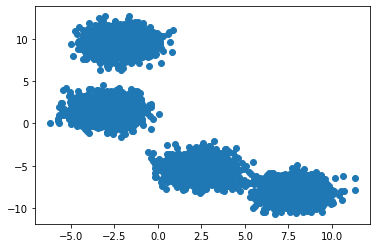

In [15]:
plot_reg_data(x)

In [16]:
K=4
cc_pos,cc_display=init_centroids(x,K)
cc_pos

[array([ 1.42568274, -5.67335628]),
 array([-2.6778312 ,  0.80273903]),
 array([ 6.82806504, -7.96935239]),
 array([-2.59750225,  2.16923127])]

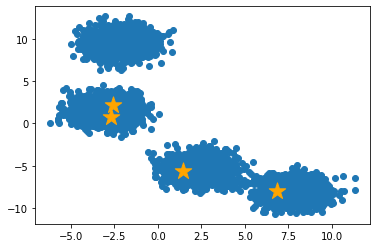

In [17]:
get_centroids(x, cc_display)

In [18]:
n_init=50
cent, idx = run_kMean(x, cc_pos, n_init)

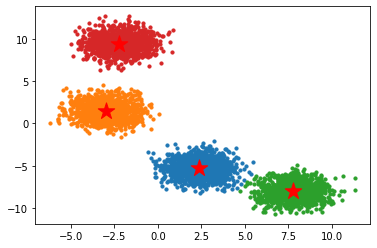

In [19]:
plot_in_col(x, f_cent, idx, cent)

In [20]:
# ELBOW 

In [21]:
'''
Generating new clusters and calculating distance 
'''
nc_lst = [] # centroid pos
p_lst = [] # cluster pos
centroids_lst = [] # number of centroids per cluster
k=5
for i in range(1,k):
    f_cent, x, xx, yy = generate_fake_data(i)
    cc_pos,cc_display=init_centroids(x,K)
    cent, idx = run_kMean(x, cc_pos, n_init)
    # appending positions to list
    nc_lst.append(cent)
    p_lst.append(idx)
    centroids_lst.append(x)
    


In [22]:
def dist_2d(a,b):
    squared_distance = 0
    for i in range(len(a)):
        squared_distance += (a[i] - b[i])**2
    dist = np.sqrt(squared_distance)
    return dist

In [23]:
sum_lst = []
for i in range(len(nc_lst)):
    # distance betwwn centroid and repective cluster
    test_sse_1 = dist_2d(nc_lst[i], p_lst[i]) 
    # appending each distance to list
    sum_lst.append(test_sse_1)

In [24]:
print(sum_lst)

[array([12.75731354, 19.36090117]), array([11.05901477, 13.95366044]), array([10.33275012, 14.28137234]), array([ 8.51567009, 14.10440491])]


In [25]:
cc_sort = np.sort(nc_lst)
cent_sort = np.sort(centroids_lst)

In [26]:
'''
getting lowes value
'''
#for c in range(len(sum_lst)):
sum_sort = np.sort(np.array(sum_lst), axis=1)
sum_sort

array([[12.75731354, 19.36090117],
       [11.05901477, 13.95366044],
       [10.33275012, 14.28137234],
       [ 8.51567009, 14.10440491]])

In [27]:
# make one-dimn array and sort (decending)
x_test = np.concatenate(sum_sort)
x_test = np.sort(x_test)[::-1]
print(x_test)

[19.36090117 14.28137234 14.10440491 13.95366044 12.75731354 11.05901477
 10.33275012  8.51567009]


Text(0, 0.5, 'SUM OF SQUARE ERROR')

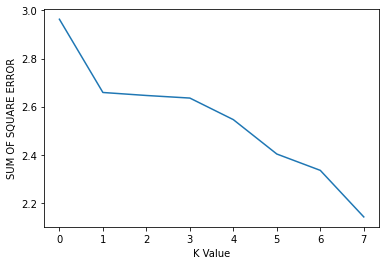

In [28]:
pyplot.plot(np.log(x_test))
pyplot.xlabel('K Value')
pyplot.ylabel('SUM OF SQUARE ERROR')

Block below is for validating our elbow method against sklearn's built in

Text(0.5, 1.0, 'Elbow curve')

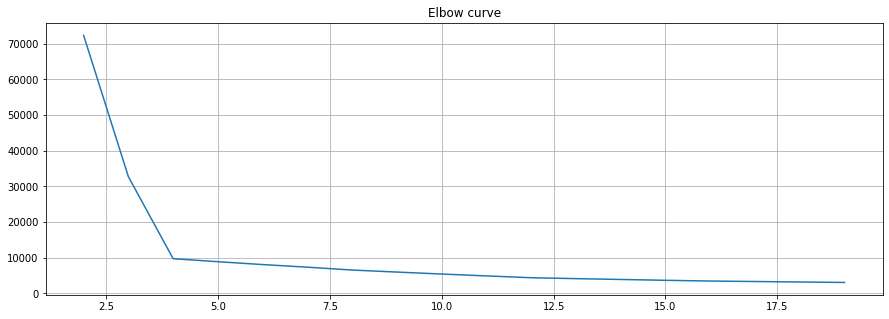

In [29]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = x 
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

# 2 Apply the K-means algorithm to compress an image

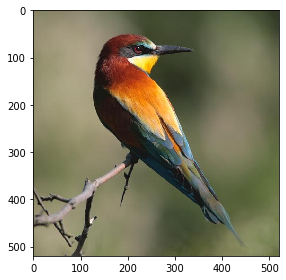

In [30]:
image = io.imread('img_test.png')
io.imshow(image)
io.show()

In [31]:
rows = image.shape[0]
cols = image.shape[1]
image = image/255
X = image.reshape(image.shape[0]*image.shape[1],3)

In [32]:
K = 16 #number of clusters
max_iters = 50 #number of times the k-mean should run

In [33]:
initial_centroids, initial_centroids2 = init_centroids(X,K)
centroids,idx = run_kMean(X,initial_centroids,max_iters)
print(np.shape(centroids))
print(np.shape(idx))

(16, 3)
(270400,)


In [34]:
idx = closest_centroids(X,centroids)
X_recovered = centroids[idx]
X_recovered = np.reshape(X_recovered, (rows, cols, 3))

In [35]:
imageio.imwrite('img_test_new.png', X_recovered)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


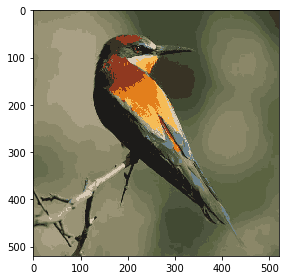

In [36]:
image_compressed = io.imread('img_test_new.png')
io.imshow(image_compressed)
io.show()

In [37]:
info = os.stat('img_test.png')
print("size before compressed: ",info.st_size/1024,"KB")
info = os.stat('img_test_new.png')
print("size after compressed: ",info.st_size/1024,"KB")

size before compressed:  187.5205078125 KB
size after compressed:  47.970703125 KB


# 3 Use AIC and BIC to choose K for Gaussian Mixture Models

In [49]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer().data

from sklearn.mixture import GaussianMixture

In [83]:
def aic_re(k, likelyhood):
    return 2*k-2*likelyhood

def bic_re(likelihood, k, N):
    return likelihood+(1/2)*k*np.log(N)

def aic_bic(k, data):
    a = []
    b = []
    for i in range(1,k):
        gm = GaussianMixture(n_components = i, random_state=0).fit(data)
        likelihood = gm.score(data)
        s, h = data.shape
        N = 80
        #x = np.amax(likelihood)
        aa = aic_re(k,likelihood)
        bb = bic_re(likelihood,k,N)
        s
        a.append(aa)
        b.append(bb)
    return a,b


In [84]:
kk = 80
ac, bc = aic_bic(kk, data)

In [72]:
#ac
#bc

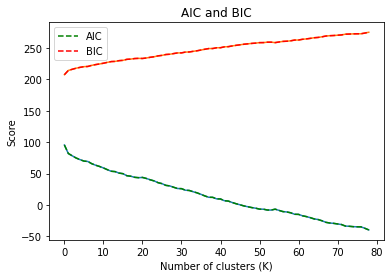

In [85]:
x_axis = range(kk-1)

pyplot.plot(x_axis,ac)
pyplot.plot(x_axis,bc)
pyplot.title('AIC and BIC')
pyplot.xlabel('Number of clusters (K)')
pyplot.ylabel('Score')
pyplot.plot(ac, 'g--', label="AIC")
pyplot.plot(bc, 'r--', label="BIC")
pyplot.legend()
pyplot.show()

In [78]:
x_axis

18